In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
# Defining all the Categories 
data.target_names
Categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
#Training the Data on these categories
train = fetch_20newsgroups(subset='train',categories=Categories)
# Testing the data on these categories
test = fetch_20newsgroups(subset='test',categories=Categories)

In [7]:
X = pd.DataFrame(train.data)
X
Xt = pd.DataFrame(test.data)
Xt

,0
0,From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. ...
1,From: Rick Miller <rick@ee.uwm.edu>\nSubject: ...
2,From: mathew <mathew@mantis.co.uk>\nSubject: R...
3,From: bakken@cs.arizona.edu (Dave Bakken)\nSub...
4,From: livesey@solntze.wpd.sgi.com (Jon Livesey...
...,...
7527,From: richmond@spiff.Princeton.EDU (Stupendous...
7528,From: smytonj@murr11.alleg.edu (Jim Smyton)\nS...
7529,From: hhenderson@vax.clarku.edu\nSubject: RE: ...
7530,From: b859zam@utarlg.uta.edu \nSubject: INTEL ...


In [8]:
print(len(train.data))
print(len(test.data))

11314
7532


In [9]:
# Importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Creating a Model based on the MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data,train.target)

# Creating labels for the Test data

y_pred = model.predict(test.data)

Text(153.75, 0.5, 'Predicted Label')

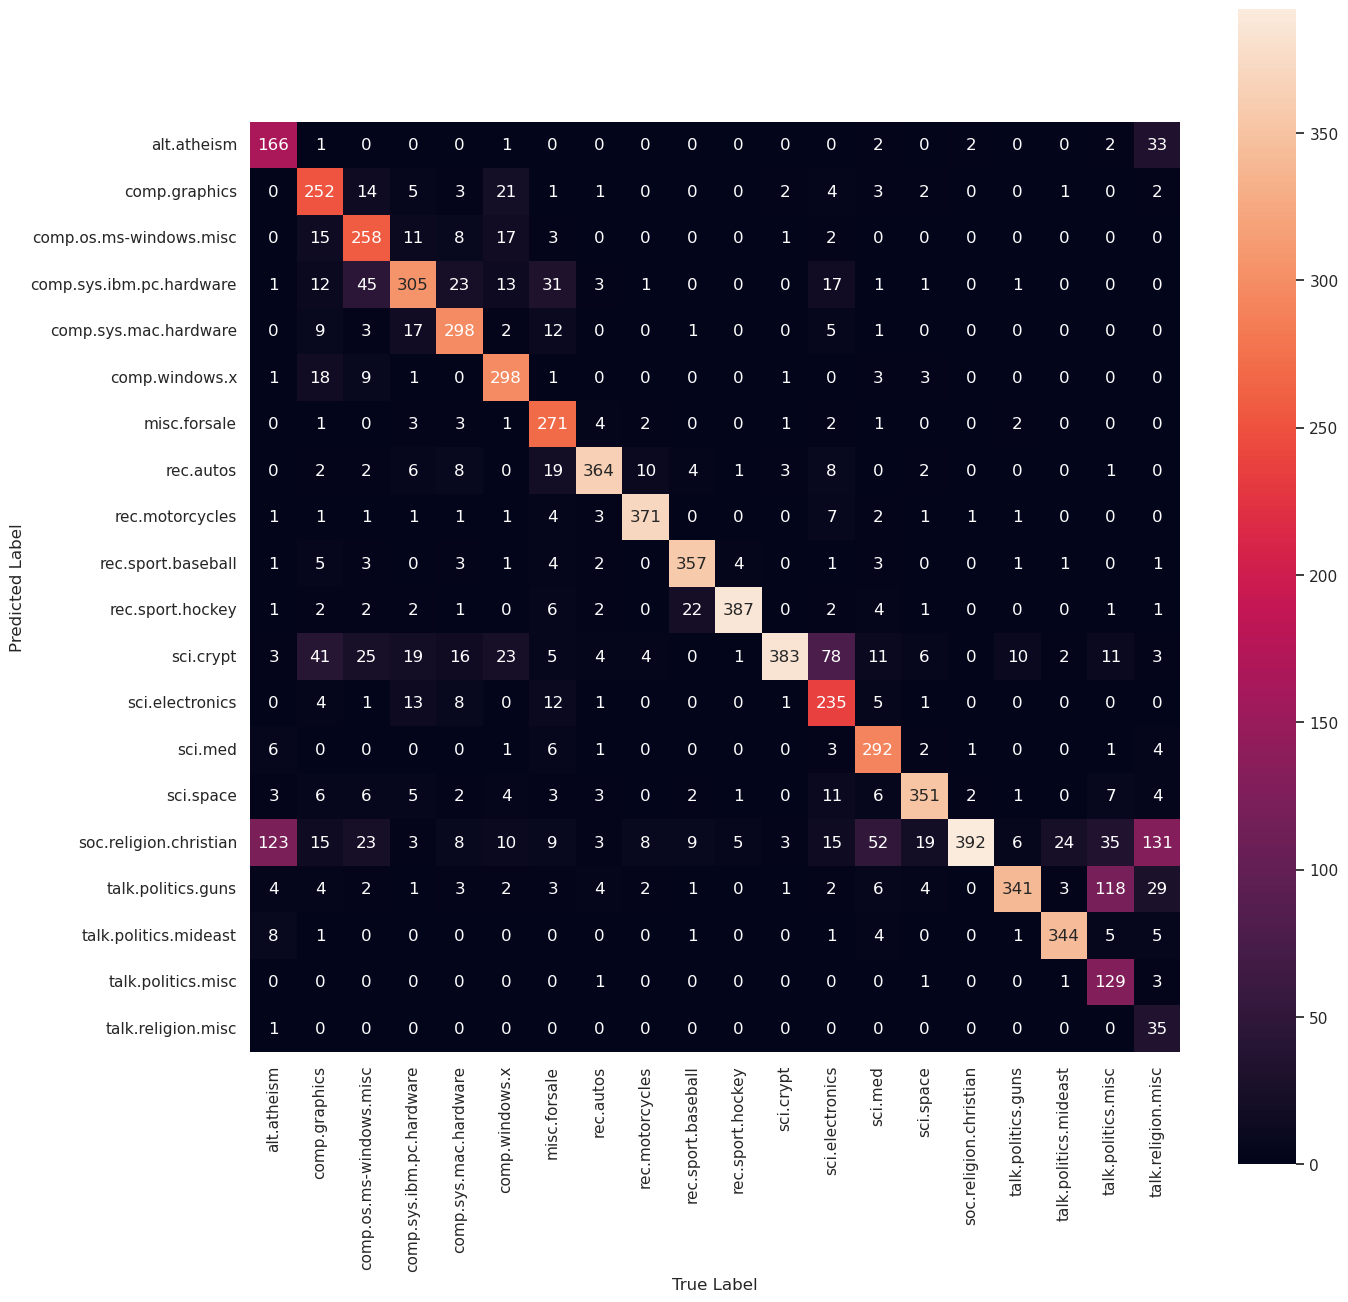

In [10]:
# Creating Confusion matrix and heat map
plt.figure(figsize=(15,15))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [11]:
#cbar = False

In [12]:
#Predicting Categories on new news data
def predict_category(s,train=train,model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]
print(predict_category('Jesus Christ'))
print(predict_category('Sending load to International Space Station'))

soc.religion.christian
sci.space
